<a href="https://colab.research.google.com/github/Batuh1907/Batuh1907/blob/IE423/Task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/continuous dataset.csv',
                 index_col=[0],
                  parse_dates=[0])

Mounted at /content/drive


In [2]:
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


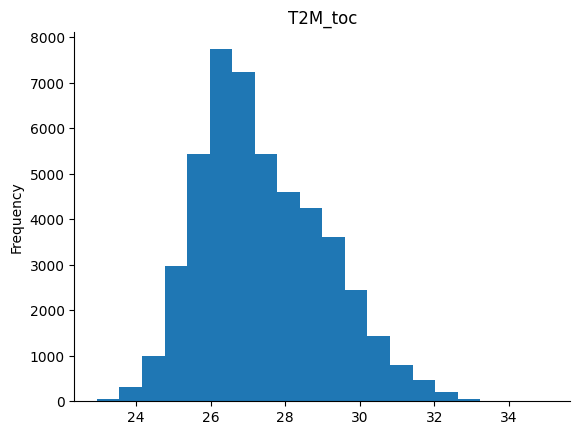

In [6]:
from matplotlib import pyplot as plt
df['T2M_toc'].plot(kind='hist', bins=20, title='T2M_toc')
plt.gca().spines[['top', 'right',]].set_visible(False)

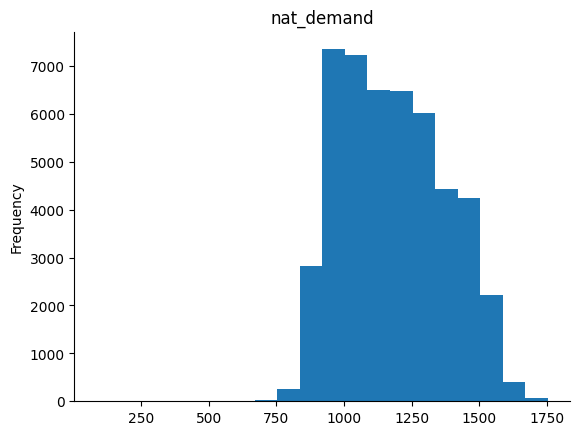

In [7]:
from matplotlib import pyplot as plt
df['nat_demand'].plot(kind='hist', bins=20, title='nat_demand')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='datetime'>

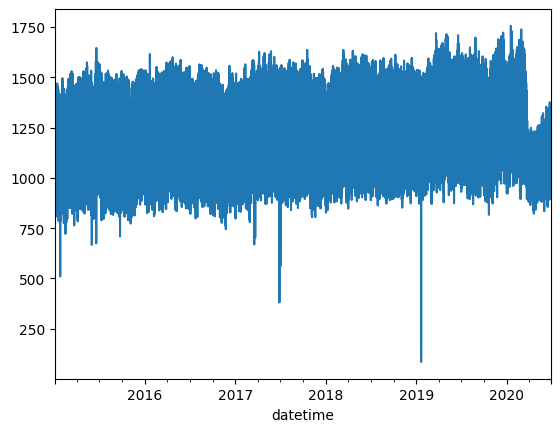

In [8]:
df["nat_demand"].plot()

In [9]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Use isocalendar().week
    df['date_offset'] = (df.date.dt.month * 100 + df.date.dt.day - 320) % 1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall', 'Winter'])
    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'weekday', 'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='nat_demand')
features_and_target = pd.concat([X, y], axis=1)

In [10]:
features_and_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,nat_demand
datetime,,,,,,,,,,,
2015-01-03 01:00:00,1,5,1,1,2015,3,3,1,Saturday,Winter,970.3450
2015-01-03 02:00:00,2,5,1,1,2015,3,3,1,Saturday,Winter,912.1755
2015-01-03 03:00:00,3,5,1,1,2015,3,3,1,Saturday,Winter,900.2688
2015-01-03 04:00:00,4,5,1,1,2015,3,3,1,Saturday,Winter,889.9538
2015-01-03 05:00:00,5,5,1,1,2015,3,3,1,Saturday,Winter,893.6865
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,20,4,2,6,2020,178,26,26,Friday,Summer,1128.5592
2020-06-26 21:00:00,21,4,2,6,2020,178,26,26,Friday,Summer,1112.7488
2020-06-26 22:00:00,22,4,2,6,2020,178,26,26,Friday,Summer,1081.5680


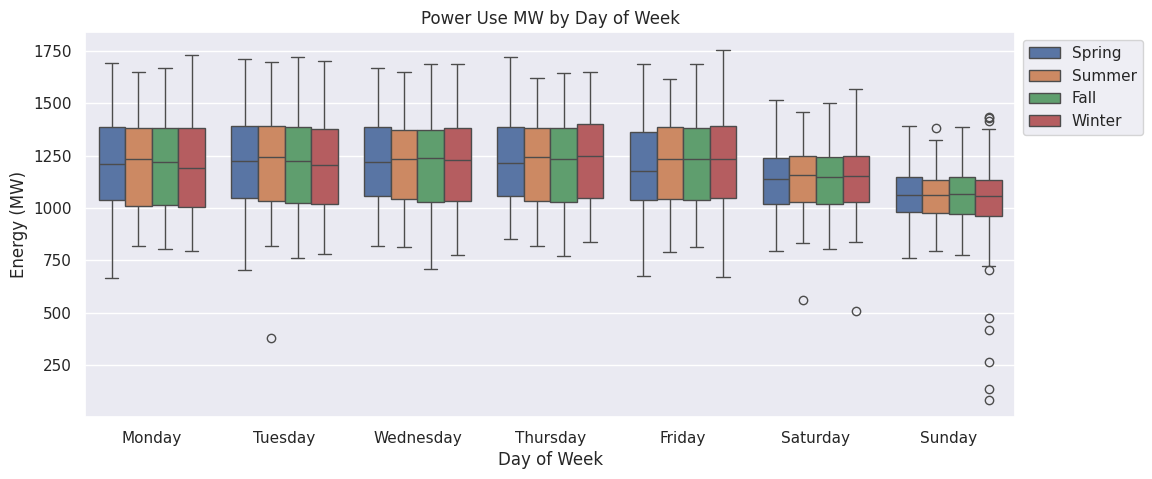

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='nat_demand',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power Use MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [12]:
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


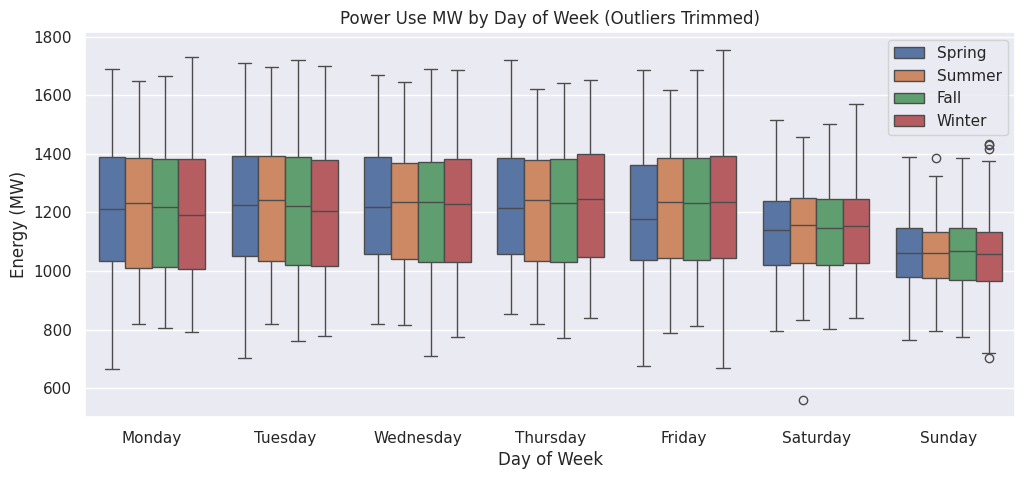

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Q1 = df['nat_demand'].quantile(0.25)
Q3 = df['nat_demand'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFramefeatures_and_target to exclude outliers
filtered_df = features_and_target[(features_and_target['nat_demand'] >= lower_bound) & (features_and_target['nat_demand'] <= upper_bound)]

# Create the boxplot with trimmed outliers
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=filtered_df.dropna(),
            x='weekday',
            y='nat_demand',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power Use MW by Day of Week (Outliers Trimmed)')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()